### Import Anatomist (must be in a BrainVisa environment)

In [1]:
import anatomist.api as ana
from soma.qt_gui.qtThread import QtThreadCall
from soma.qt_gui.qt_backend import Qt

a = ana.Anatomist()

from soma import aims


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/volatile/ad279118/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/volatile/ad279118/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [1]:
import numpy as np
import pandas as pd
import os
import glob

In [2]:
base_path = "/volatile/ad279118/Irene/MOSTEST/Results/ChampollionV0"
region_model = "SFint-FCMant_right/trained_on_UKB40/16-55-54_1"

From the variable base_path, the files must then be ordered as:

```
SFint-FCMant_left
└── trained_on_UKB40
    └── 16-55-54_0
        ├── Correlation_Matrix_SNPs_MOSTest.eps
        ├── extracted_genotypes.raw
        ├── mostest_imputed_autosomes_decim_maf-0.05.most_orig.sumstats
        ├── mostest_imputed_autosomes_decim_maf-0.05_most_orig.zmat.tsv
        └── pheno_pre_residualized.txt
```

In [3]:
pre_residualized_bdd = pd.read_csv(f'{base_path}/{region_model}/pheno_pre_residualized.txt', sep='\t')
z_score = pd.read_csv(f'{base_path}/{region_model}/mostest_imputed_autosomes_decim_maf-0.05_most_orig.zmat.tsv', sep='\t')

pre_residualized_bdd = pre_residualized_bdd.drop('#FID', axis=1)
pre_residualized_bdd = pre_residualized_bdd.set_index('IID')

In [4]:
path_to_lead_SNPs = glob.glob(f'{base_path}/{region_model}/FUMA_job*/leadSNPs.txt')[0]
FUMA_lead_SNP = pd.read_csv(path_to_lead_SNPs, sep='\t', index_col=0)
FUMA_lead_SNP

,GenomicLocus,uniqID,rsID,chr,pos,p,nIndSigSNPs,IndSigSNPs
No,,,,,,,,
1,1,1:19968058:C:T,rs12408663,1,19968058,1.814041e-13,1,rs12408663
2,2,2:37079583:C:T,rs62132522,2,37079583,4.887138e-11,1,rs62132522
3,3,2:65974233:C:G,rs6743531,2,65974233,1.575411e-10,1,rs6743531
4,4,2:109955290:C:T,rs7421851,2,109955290,2.351573e-09,1,rs7421851
5,5,2:188353663:G:T,rs8176501,2,188353663,3.247725e-09,1,rs8176501
6,6,3:52568805:G:T,rs7639267,3,52568805,8.628843e-11,1,rs7639267
7,7,3:147106319:C:T,rs2279829,3,147106319,1.225684e-08,1,rs2279829
8,8,3:177316085:A:C,rs4241484,3,177316085,1.680526e-13,2,rs4241484;rs552757
9,9,5:92187932:C:T,rs17669337,5,92187932,2.250618e-09,1,rs17669337


In [10]:
print(pre_residualized_bdd.shape)
pre_residualized_bdd = pre_residualized_bdd[[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]
pre_residualized_bdd.iloc[:,:5].head()

(36000, 41)


,dim1,dim2,dim3,dim4,dim5
IID,,,,,
1000021,0.628218,-1.708885,-1.428725,-0.590243,-0.031094
1000325,-0.350118,0.798591,0.807820,0.852636,-0.134123
1000458,1.035778,0.371073,0.003934,-0.058765,-1.440219
1000575,-0.064695,1.445741,-0.724786,-0.741915,-0.486698
1000606,-0.957629,-1.551401,-1.192737,-0.407881,2.167530


### First approach using the Z-scores to find a direction in the latent space

In [11]:
print(z_score.shape)
z_score = z_score[['CHR','SNP','PVAL', 'N', 'FREQ']+[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]
z_score.iloc[:,:8].head()

(1296, 46)


,CHR,SNP,PVAL,N,FREQ,dim1,dim2,dim3
0,1,rs1995312,1.659226e-08,41313.0,0.251652,3.510661,-0.447292,4.083768
1,1,rs16822413,1.954248e-08,41327.0,0.251700,3.529509,-0.410000,4.130117
2,1,rs10429880,8.377749e-10,41092.0,0.240473,3.613584,0.125791,4.189022
3,1,rs10917498,6.527683e-11,41182.0,0.239595,3.762749,0.035373,4.231443
4,1,rs7517255,6.527683e-11,41185.0,0.239456,3.762749,0.035373,4.231443


In [12]:
def project(direction, latent=pre_residualized_bdd):
    # Compute the dot product of each row in pre_residualized_bdd with the direction
    dot_products = latent.apply(lambda row: np.dot(row, direction), axis=1)


    direction = np.dot(direction, direction)
    projections = dot_products / direction

    # Sort the series by the projection values
    sorted_projections = projections.sort_values(ascending=False)

    return sorted_projections

In [13]:
genotype = pd.read_csv(f'{base_path}/{region_model}/extracted_genotypes.raw', sep='\t')
genotype.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs12408663_C,rs62132522_C,rs6743531_C,rs7421851_C,...,rs2214230_T,rs4556147_T,rs6478240_G,rs9695700_A,rs11049390_A,rs79487293_T,rs12146713_C,rs4924346_A,rs4843552_A,rs3874943_G
0,1000021,1000021,0,0,1,-9,0.0,0.0,2.0,2.0,...,1.0,1.0,1.0,2.0,0.0,1,1,0.0,1.0,1.0
1,1000325,1000325,0,0,1,-9,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,2.0
2,1000458,1000458,0,0,1,-9,0.0,1.0,0.0,2.0,...,1.0,0.0,1.0,2.0,1.0,1,1,1.0,2.0,1.0
3,1000575,1000575,0,0,1,-9,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1,1,0.0,2.0,2.0
4,1000606,1000606,0,0,2,-9,1.0,0.0,2.0,1.0,...,1.0,1.0,2.0,2.0,1.0,1,0,0.0,2.0,0.0


In [31]:
genotype[['IID','SEX','rs12408663_C']].head()

,IID,SEX,rs12408663_C
0,1000021,1,0.0
1,1000325,1,0.0
2,1000458,1,0.0
3,1000575,1,0.0
4,1000606,2,1.0


rs12408663 

Number of subject with 0 allele C: 20606
Number of subject with 1 allele C: 12505
Number of subject with 2 allele C: 1817


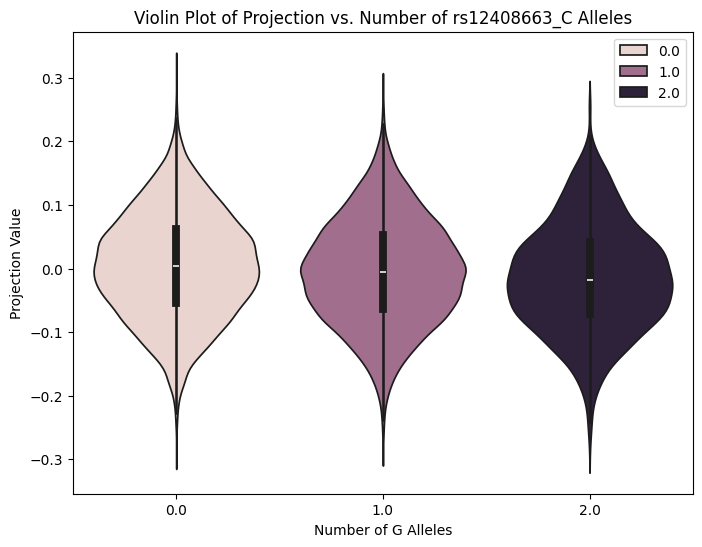

rs62132522 

Number of subject with 0 allele C: 11721
Number of subject with 1 allele C: 17439
Number of subject with 2 allele C: 6328


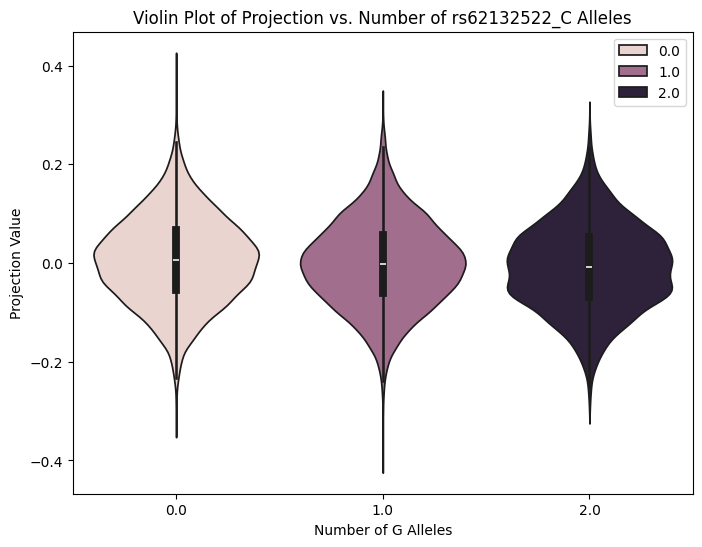

rs6743531 

Number of subject with 0 allele C: 5634
Number of subject with 1 allele C: 16951
Number of subject with 2 allele C: 13277


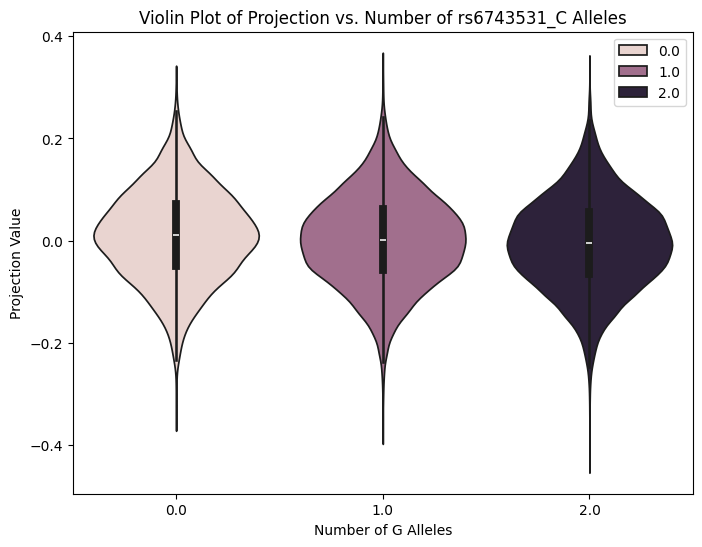

rs7421851 

Number of subject with 0 allele C: 8306
Number of subject with 1 allele C: 17932
Number of subject with 2 allele C: 9596


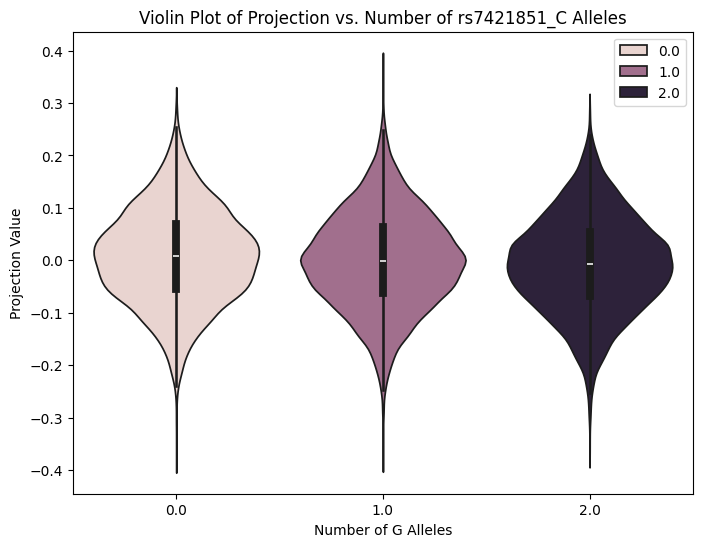

rs8176501 

Number of subject with 0 allele G: 17704
Number of subject with 1 allele G: 14939
Number of subject with 2 allele G: 3125


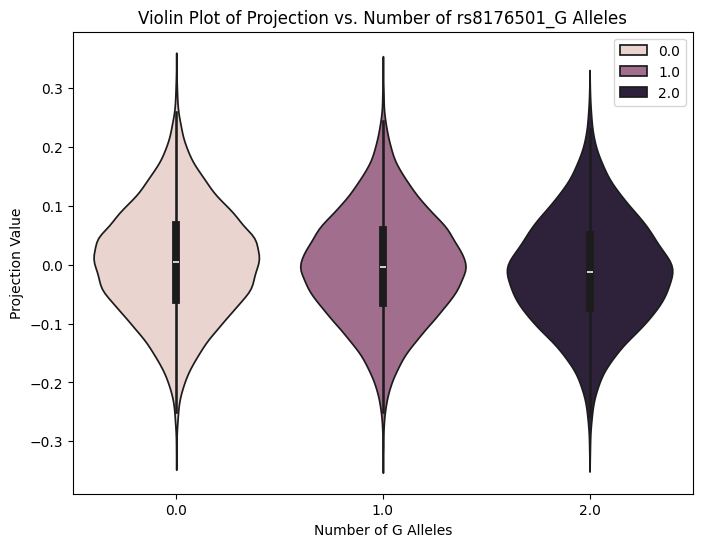

rs7639267 

Number of subject with 0 allele T: 7035
Number of subject with 1 allele T: 17618
Number of subject with 2 allele T: 11231


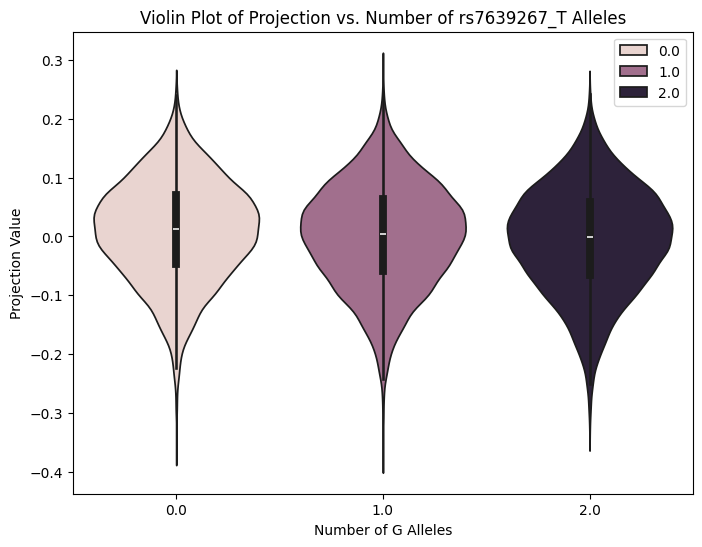

rs2279829 

Number of subject with 0 allele T: 21914
Number of subject with 1 allele T: 12141
Number of subject with 2 allele T: 1683


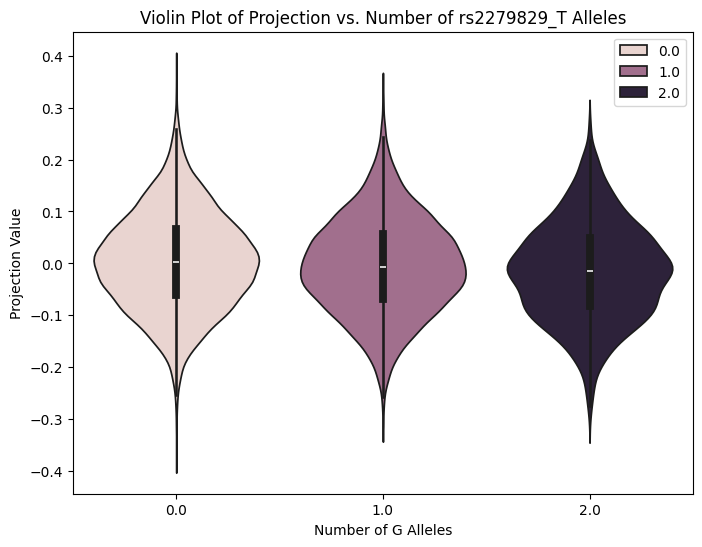

rs4241484 

Number of subject with 0 allele A: 6056
Number of subject with 1 allele A: 17106
Number of subject with 2 allele A: 12141


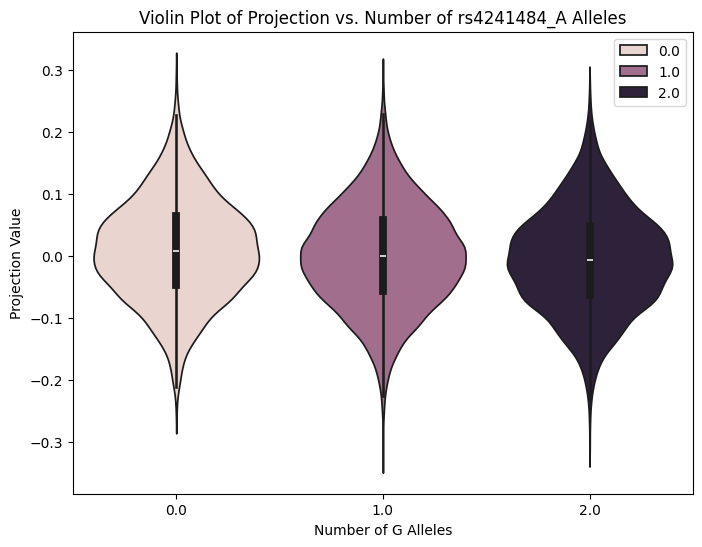

rs17669337 

Number of subject with 0 allele T: 12560
Number of subject with 1 allele T: 17253
Number of subject with 2 allele T: 6128


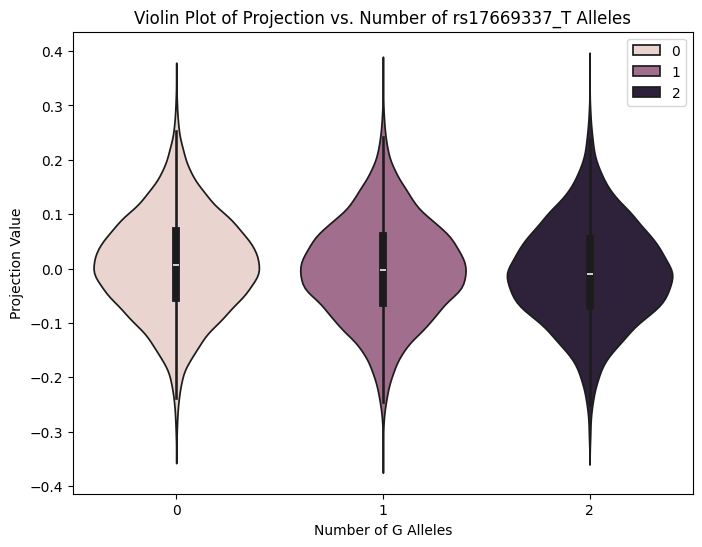

rs12187568 

Number of subject with 0 allele G: 29619
Number of subject with 1 allele G: 3400
Number of subject with 2 allele G: 97


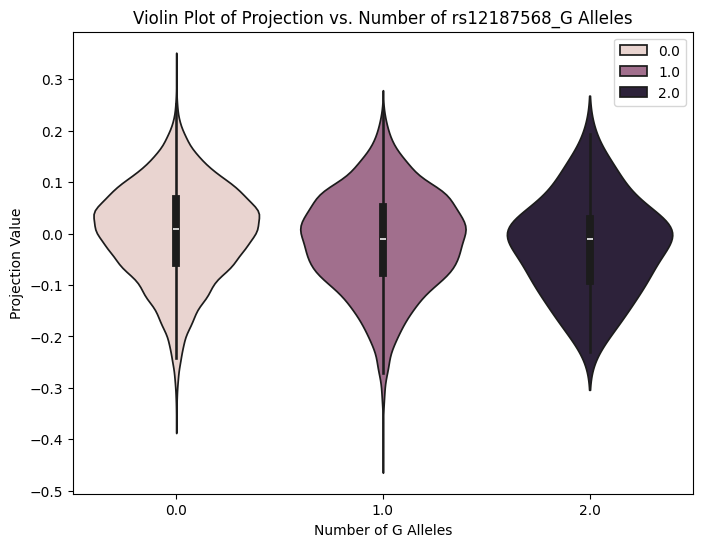

rs199205 

Number of subject with 0 allele C: 1233
Number of subject with 1 allele C: 10635
Number of subject with 2 allele C: 22794


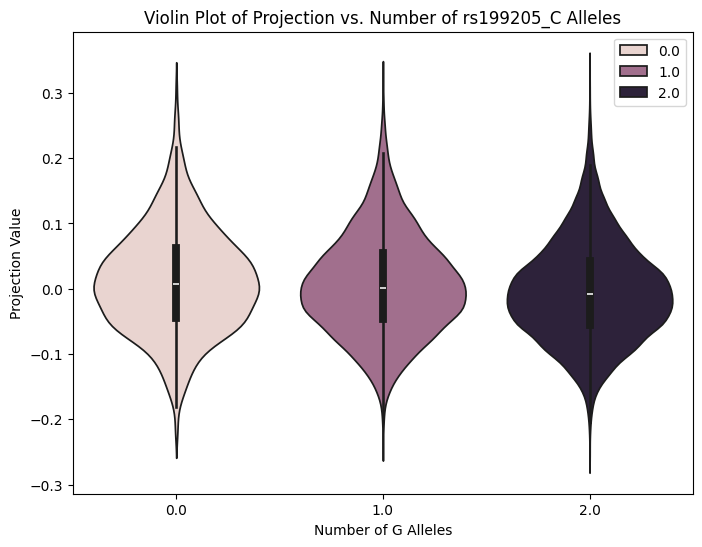

rs4714262 

Number of subject with 0 allele C: 11744
Number of subject with 1 allele C: 17192
Number of subject with 2 allele C: 6246


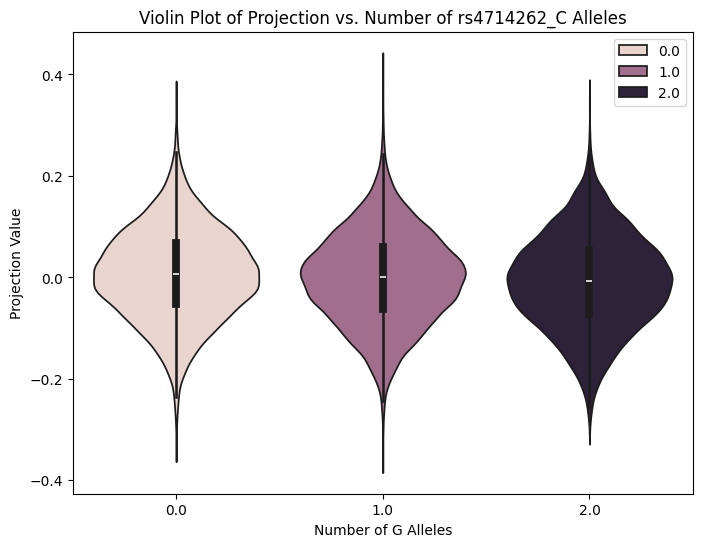

rs11963634 

Number of subject with 0 allele G: 16993
Number of subject with 1 allele G: 15515
Number of subject with 2 allele G: 3433


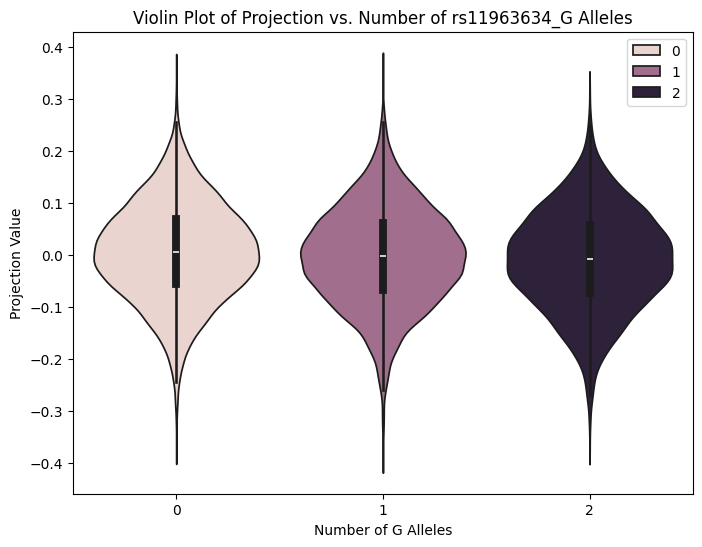

rs9388490 

Number of subject with 0 allele T: 11309
Number of subject with 1 allele T: 17514
Number of subject with 2 allele T: 6862


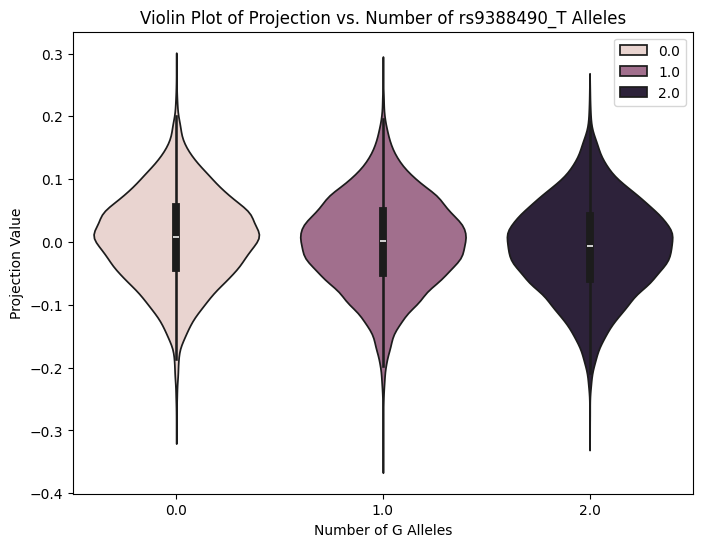

rs3001020 

Number of subject with 0 allele T: 13274
Number of subject with 1 allele T: 16356
Number of subject with 2 allele T: 5196


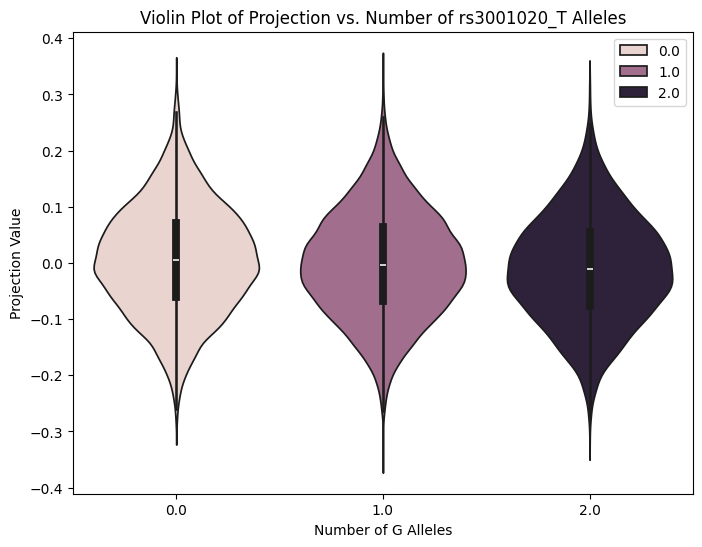

rs798518 

Number of subject with 0 allele G: 17075
Number of subject with 1 allele G: 15375
Number of subject with 2 allele G: 3413


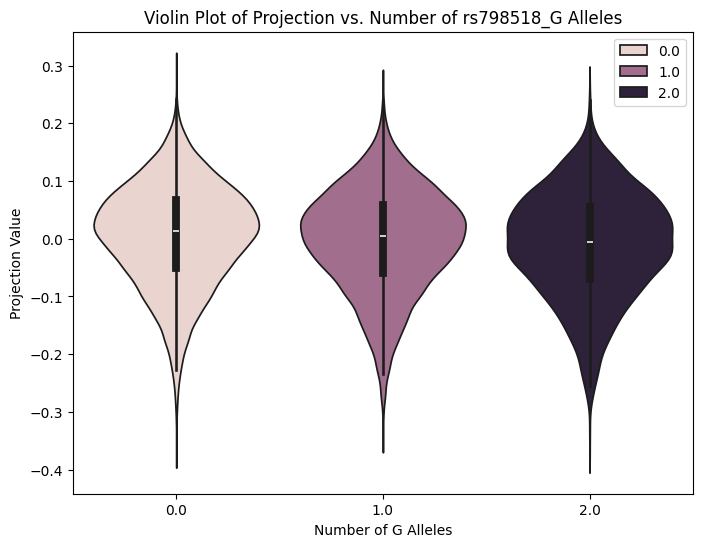

rs2214230 

Number of subject with 0 allele T: 14576
Number of subject with 1 allele T: 16257
Number of subject with 2 allele T: 4393


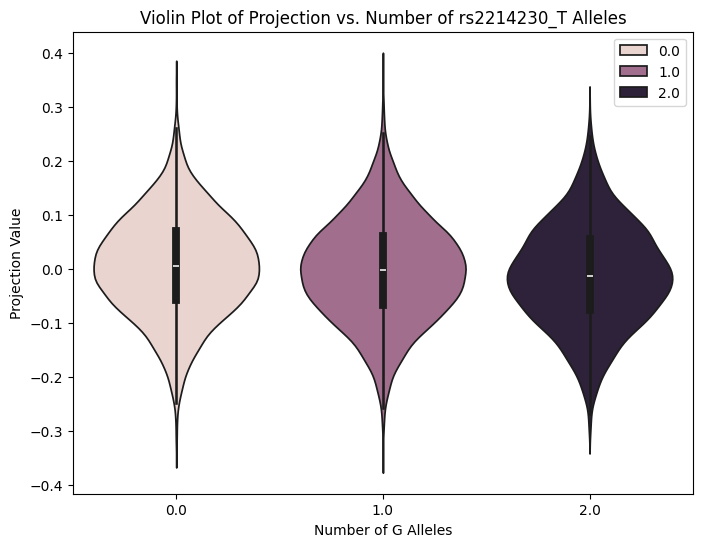

rs4556147 

Number of subject with 0 allele T: 21726
Number of subject with 1 allele T: 12283
Number of subject with 2 allele T: 1752


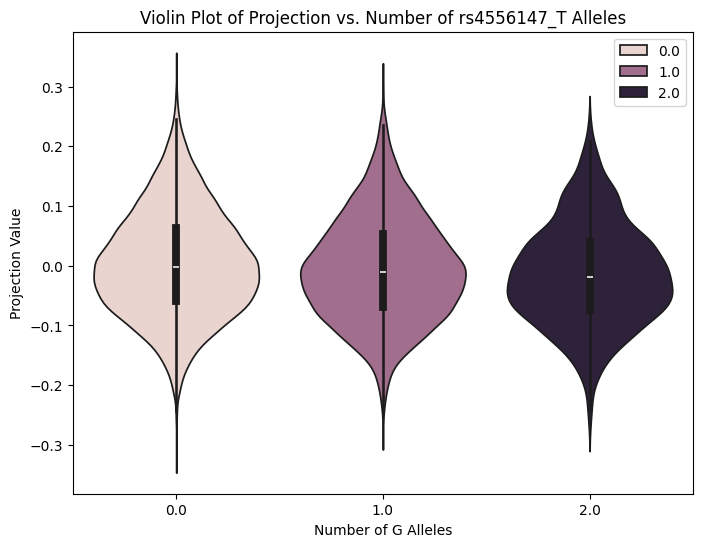

rs6478240 

Number of subject with 0 allele G: 14372
Number of subject with 1 allele G: 16649
Number of subject with 2 allele G: 4915


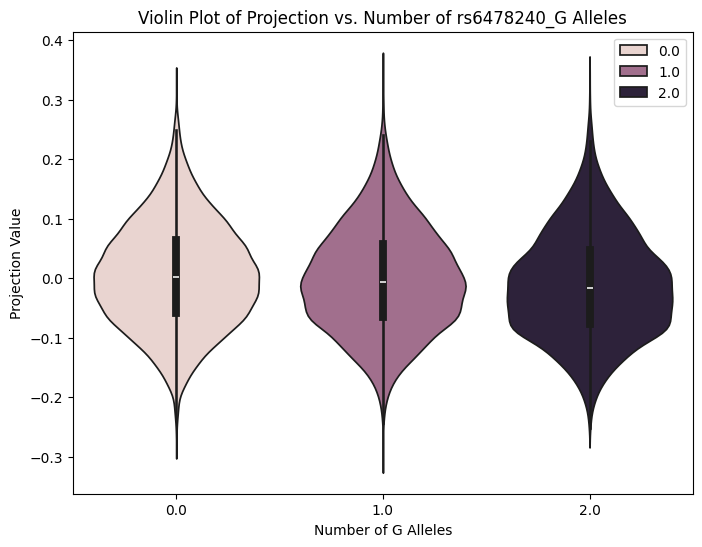

rs9695700 

Number of subject with 0 allele A: 677
Number of subject with 1 allele A: 8314
Number of subject with 2 allele A: 26800


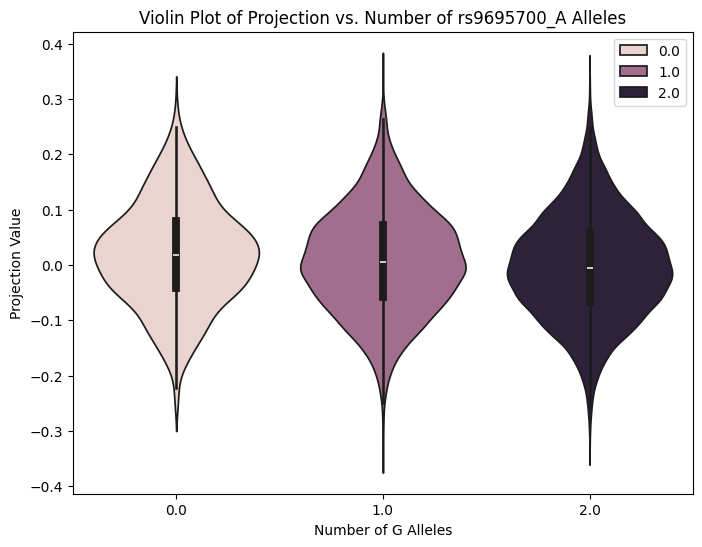

rs11049390 

Number of subject with 0 allele A: 16650
Number of subject with 1 allele A: 15443
Number of subject with 2 allele A: 3532


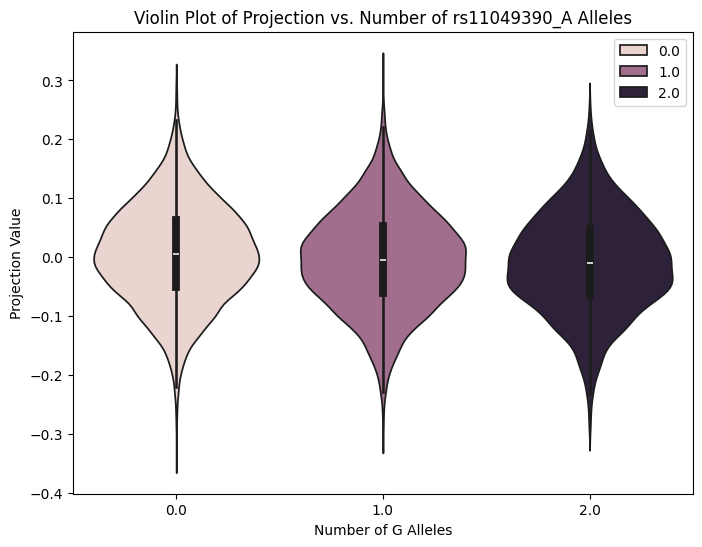

rs79487293 

Number of subject with 0 allele T: 16216
Number of subject with 1 allele T: 15953
Number of subject with 2 allele T: 3772


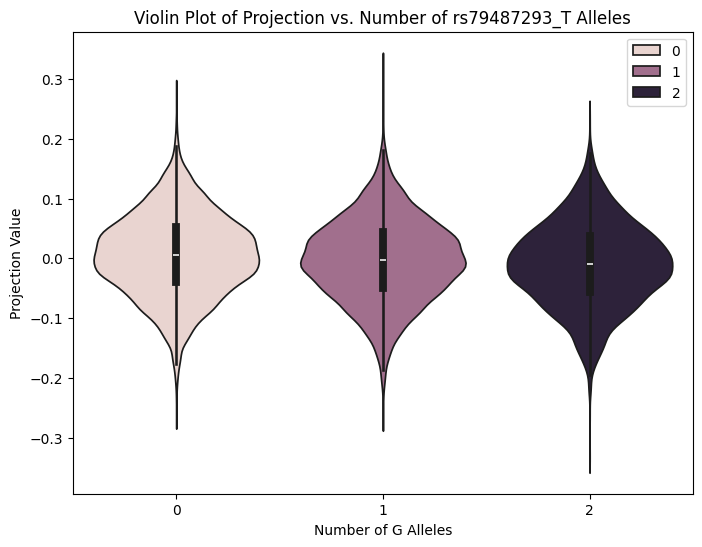

rs12146713 

Number of subject with 0 allele C: 29416
Number of subject with 1 allele C: 6181
Number of subject with 2 allele C: 344


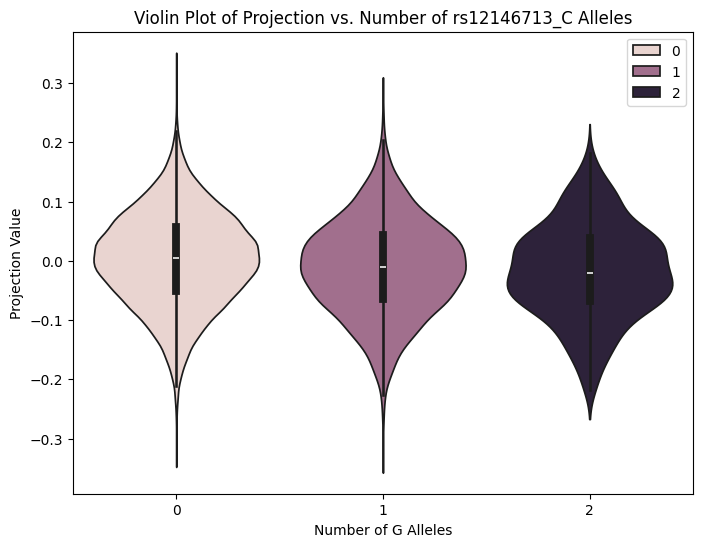

rs4924346 

Number of subject with 0 allele A: 29694
Number of subject with 1 allele A: 5745
Number of subject with 2 allele A: 270


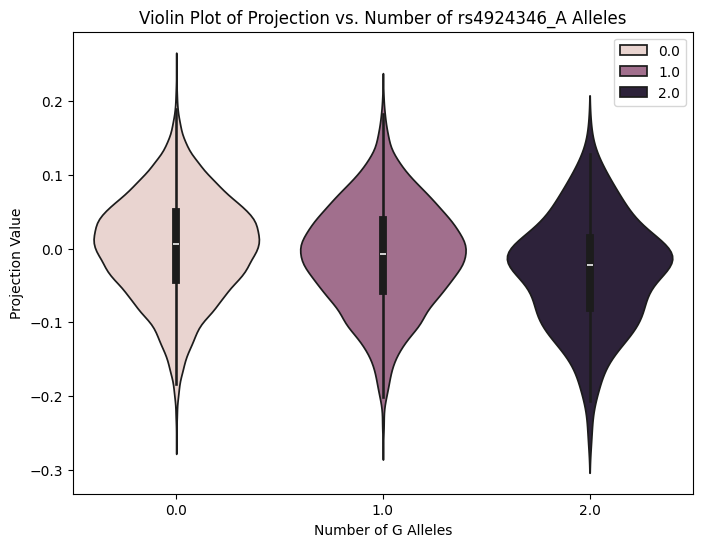

rs4843552 

Number of subject with 0 allele A: 6372
Number of subject with 1 allele A: 17319
Number of subject with 2 allele A: 11953


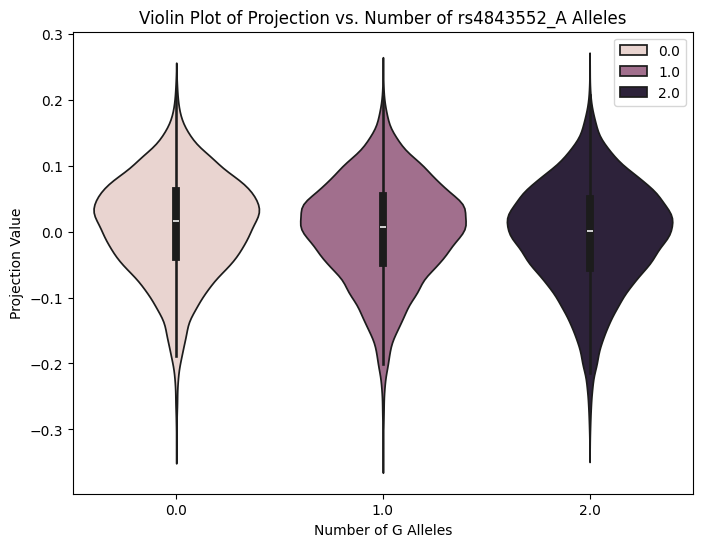

rs3874943 

Number of subject with 0 allele G: 7292
Number of subject with 1 allele G: 15633
Number of subject with 2 allele G: 8304


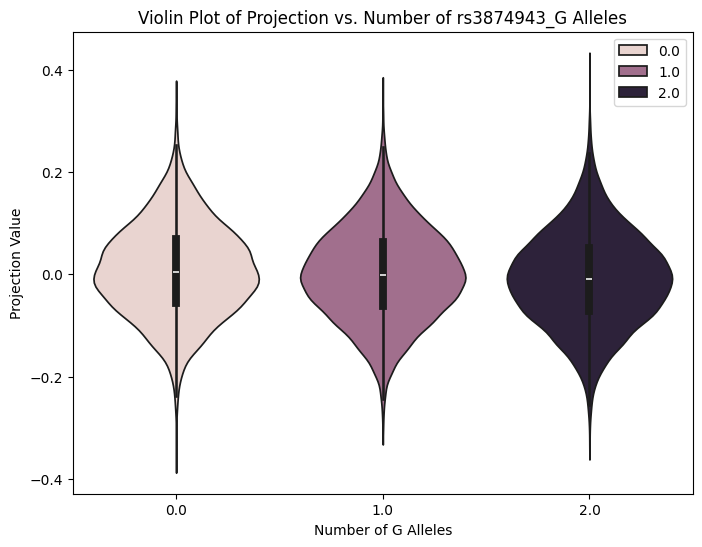

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

direction_sum_square_Z_score = False
depending_on_SEX = False

#SELECTED_SNP = "rs10917502"
for SELECTED_SNP in FUMA_lead_SNP.rsID:
    print(SELECTED_SNP, "\n")
    speci_Z = z_score[z_score.SNP==SELECTED_SNP][[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]


    if direction_sum_square_Z_score:
        direction = np.sign(speci_Z)*speci_Z**2
    else:
        direction = speci_Z

    direction = direction.to_numpy().flatten()

    sorted_projections = project(direction, pre_residualized_bdd)
    sorted_projections.name = 'projection'
    sorted_projections_df = sorted_projections.reset_index()
    sorted_projections_df.columns = ['IID', 'projection']

    selected_columns = genotype.loc[:, genotype.columns.str.startswith(SELECTED_SNP)]
    rsids = [rsid for rsid in selected_columns.columns]
    reduced_genotype = genotype[['IID', 'SEX']+rsids]

    merged = pd.merge(sorted_projections, reduced_genotype, on='IID', how='inner')
    merged = merged.dropna()

    #print("10 first extreme cases", "\n", merged.iloc[0:10], "\n")
    #print("10 last extreme cases", "\n",merged.iloc[-10:], "\n")
    print(f"Number of subject with 0 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==0]))
    print(f"Number of subject with 1 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==1]))
    print(f"Number of subject with 2 allele {rsids[0][-1]}:", len(merged[merged[rsids[0]]==2]))
    
    if depending_on_SEX:

        geno_pheno_male = merged[merged.SEX==1]
        geno_pheno_female = merged[merged.SEX==2]

        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=geno_pheno_male, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles for males')
        plt.legend(loc='upper right')
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=geno_pheno_female, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles for females')
        plt.legend(loc='upper right')
        plt.show()

    else:        
        
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=rsids[0], y='projection', data=merged, hue=rsids[0])

        plt.xlabel('Number of G Alleles')
        plt.ylabel('Projection Value')
        plt.title(f'Violin Plot of Projection vs. Number of {rsids[0]} Alleles')
        plt.legend(loc='upper right')
        plt.show()

 

In [53]:
region='SFint-FCMant'
side='L'
dataset='UkBioBank40'

In [54]:
def to_bucket(obj):
    if obj.type() == obj.BUCKET:
        return obj
    avol = a.toAimsObject(obj)
    c = aims.Converter(intype=avol, outtype=aims.BucketMap_VOID)
    abck = c(avol)
    bck = a.toAObject(abck)
    bck.releaseAppRef()
    return bck

def build_gradient(pal):
    gw = ana.cpp.GradientWidget(None, 'gradientwidget', pal.header()['palette_gradients'])
    gw.setHasAlpha(True)
    nc = pal.shape[0]
    rgbp = gw.fillGradient(nc, True)
    rgb = rgbp.data()
    npal = pal.np['v']
    pb = np.frombuffer(rgb, dtype=np.uint8).reshape((nc, 4))
    npal[:, 0, 0, 0, :] = pb
    npal[:, 0, 0, 0, :3] = npal[:, 0, 0, 0, :3][:, ::-1]  # BGRA -> RGBA
    pal.update()

def create_gaussian_kernel(size, sigma):
    """Creates a 3D Gaussian kernel."""
    # Create a grid of (x, y, z) coordinates centered at (0, 0, 0)
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy, zz = np.meshgrid(ax, ax, ax)
    
    # Calculate the Gaussian function
    kernel = np.exp(-(xx**2 + yy**2 + zz**2) / (2. * sigma**2))
    
    # Normalize the kernel to ensure the sum is 1
    kernel = kernel / np.sum(kernel)
    
    return kernel

def buckets_average(subject_id_list, dataset_name_list, kernel_size=2, sigma=1):
    dic_vol = {}
    dim = 0
    rep = 0
    if len(subject_id_list) == 0:
        return False
    while dim == 0 and rep < len(subject_id_list):
        if dataset_name_list[rep].lower() in ['ukb', 'ukbiobank', 'projected_ukb', 'ukbiobank40']:
            dataset = 'UkBioBank40'
        mm_skeleton_path = f"/neurospin/dico/data/deep_folding/current/datasets/{dataset}/crops/2mm/{region}/mask/{side}crops"
        if os.path. isfile(f'{mm_skeleton_path}/{subject_id_list[rep]}_cropped_skeleton.nii.gz'):
            sum_vol = aims.read(f'{mm_skeleton_path}/{subject_id_list[rep]}_cropped_skeleton.nii.gz').astype(float)
            dim = sum_vol.shape
            sum_vol.fill(0)
        else: 
            print(f'FileNotFound {mm_skeleton_path}/{subject_id_list[rep]}_cropped_skeleton.nii.gz')
            #raise FileNotFoundError(f'{mm_skeleton_path}/{subject_id_list[0]}_cropped_skeleton.nii.gz')
        rep += 1

    for subject_id, dataset in zip(subject_id_list,dataset_name_list):
        if dataset.lower() in ['ukb', 'ukbiobank',  'projected_ukb']:
            dataset = 'UkBioBank40'
        elif dataset.lower() == 'hcp':
            dataset = 'hcp'
            
        mm_skeleton_path = f"/neurospin/dico/data/deep_folding/current/datasets/{dataset}/crops/2mm/{region}/mask/{side}crops"

        if os.path. isfile(f'{mm_skeleton_path}/{subject_id}_cropped_skeleton.nii.gz'):
            vol = aims.read(f'{mm_skeleton_path}/{subject_id}_cropped_skeleton.nii.gz')
            # compare the dim with the first file dim

            if vol.np.shape != dim:
                raise ValueError(f"{subject_id_list[0]} and {subject_id} must have the same dim")

                
            # to have a binary 3D structure
            struc3D = (vol.np > 0).astype(int)
            dic_vol[subject_id] = struc3D
            #print(np.count_nonzero(struc3D))
            sum_vol.np[:] += struc3D # without Gaussian filter

            # Remove the singleton dimension temporarily
            #struc3D_3d = np.squeeze(struc3D, axis=-1)
            #gaussian_kernel = create_gaussian_kernel(kernel_size, sigma)

            #print(np.max(convolve(struc3D_3d, gaussian_kernel)))
            #convolved_result_3d = convolve(struc3D_3d, gaussian_kernel, mode='same')
            #convolved_result = convolved_result_3d[..., np.newaxis]

            #sum_vol.np[:] += convolved_result # with Gaussian filter
            
        else: 
            print(f'FileNotFound {mm_skeleton_path}/{subject_id}_cropped_skeleton.nii.gz')
            #raise FileNotFoundError(f'{mm_skeleton_path}/{subject_id}_cropped_skeleton.nii.gz')

    sum_vol.np[:] = sum_vol.np[:] / len(subject_id_list)
    print(sum_vol.shape)
    return sum_vol

In [55]:
sorted_projections

IID
3590727    0.402851
2193886    0.370507
3691486    0.358585
3222738    0.347837
1903469    0.347695
             ...   
5519409   -0.308037
4402628   -0.328762
5050875   -0.331647
1894610   -0.334991
4452416   -0.357196
Name: projection, Length: 36000, dtype: float64

In [ ]:
average_dic = {}
nb_columns = 4
block = a.createWindowsBlock(nb_columns)

In [ ]:
step = 200
dic_packages = {}
for i in range(0,len(sorted_projections),step):
    list_idx = (sorted_projections.index[i:i+step].to_numpy())
    dic_packages[i//step] = [f'sub-{idx}' for idx in list_idx] 
list_database = ['UkBioBank' for i in range(step)]
n_pack = len(dic_packages)

In [ ]:
#for i in ([k for k in range(nb_columns)]+[k for k in range(n_pack//2-nb_columns//2,n_pack//2+nb_columns//2)]+[k for k in range(n_pack-nb_columns,n_pack)]):
for i in range(0,n_pack, n_pack//(3*nb_columns-1)):
    sum_vol = buckets_average(dic_packages[i], list_database, sigma=1)
    average_dic[f'a_sum_vol{i}'] = a.toAObject(sum_vol)
    average_dic[f'a_sum_vol{i}'].setPalette(minVal=0, absoluteMode=True)
    #wsum = a.createWindow('Sagittal', block=block)
    #wsum.addObjects(a_sum_vol)
    average_dic[f'rvol{i}'] = a.fusionObjects(objects=[average_dic[f'a_sum_vol{i}']], method='VolumeRenderingFusionMethod')
    average_dic[f'rvol{i}'].releaseAppRef()
    # custom palette
    n = len(dic_packages[i])
    pal = a.createPalette('VR-palette')
    pal.header()['palette_gradients'] = '0;0.459574;0.497872;0.910638;1;1#0;0;0.52766;0.417021;1;1#0;0.7;1;0#0;0;0.0297872;0.00851064;0.72766;0.178723;0.957447;0.808511;1;1'
    #f'0;0.244444;0.5;1;1;1#0;0;0.535897;0.222222;1;1#0;0.7;1;0#0;0;{0.5/n};0;1;1'
    build_gradient(pal)
    average_dic[f'rvol{i}'].setPalette('VR-palette', minVal=0.05, absoluteMode=True)
    pal2 = a.createPalette('slice-palette')
    pal2.header()['palette_gradients'] = '0;0.459574;0.497872;0.910638;1;1#0;0;0.52766;0.417021;1;1#0;0.7;1;0#0;0;0.0297872;0.00851064;0.72766;0.178723;0.957447;0.808511;1;1'
    #f'0;0.244444;0.5;1;1;1#0;0;0.535897;0.222222;1;1#0;0.7;1;0#0;0;{0.3/n};0;{0.7/n};1;1;1'
    build_gradient(pal2)
    average_dic[f'a_sum_vol{i}'].setPalette('slice-palette')
    # rvol.palette().fill()
    average_dic[f'wvr{i}'] = a.createWindow('3D', block=block)
    average_dic[f'wvr{i}'].addObjects(average_dic[f'rvol{i}'])

### Second approach using a regression on the residualized phenotype based on the genotype

In [16]:
bdd_geno = pd.merge(pre_residualized_bdd, genotype, on='IID', how='inner')
bdd_geno = bdd_geno.dropna()
bdd_geno.head()

,IID,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,rs2214230_T,rs4556147_T,rs6478240_G,rs9695700_A,rs11049390_A,rs79487293_T,rs12146713_C,rs4924346_A,rs4843552_A,rs3874943_G
0,1000021,0.628218,-1.708885,-1.428725,-0.590243,-0.031094,-1.723767,-0.480281,0.337929,0.851535,...,1.0,1.0,1.0,2.0,0.0,1,1,0.0,1.0,1.0
1,1000325,-0.350118,0.798591,0.807820,0.852636,-0.134123,-0.552776,0.033463,1.491171,-0.658794,...,1.0,0.0,1.0,1.0,0.0,0,0,0.0,1.0,2.0
2,1000458,1.035778,0.371073,0.003934,-0.058765,-1.440219,-0.564333,2.937795,-0.803100,-0.423519,...,1.0,0.0,1.0,2.0,1.0,1,1,1.0,2.0,1.0
3,1000575,-0.064695,1.445741,-0.724786,-0.741915,-0.486698,2.706212,-1.966903,-0.117349,-0.498174,...,0.0,0.0,0.0,1.0,1.0,1,1,0.0,2.0,2.0
4,1000606,-0.957629,-1.551401,-1.192737,-0.407881,2.167530,0.508924,-0.902055,-0.018627,0.280297,...,1.0,1.0,2.0,2.0,1.0,1,0,0.0,2.0,0.0


In [47]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import statsmodels.api as sm

# Features (latent dimensions) and target (genotype)
X = bdd_geno[[f'dim{i}' for i in range(1,pre_residualized_bdd.shape[1]+1)]]  # Select all latent dimensions
y = bdd_geno["rs4843552_A"]         # Genotype values (0, 1, or 2)


In [49]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

print("R2: ", res.rsquared)


                                 OLS Regression Results                                
Dep. Variable:            rs4843552_A   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.471
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                      0.0265
Time:                        17:00:17   Log-Likelihood:                         -39453.
No. Observations:               22981   AIC:                                  7.899e+04
Df Residuals:                   22940   BIC:                                  7.932e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
print("Predicted values: ", res.predict(), len(res.predict()))
X

Predicted values:  [-0.19584573 -0.04242984 -0.04250466 ... -0.03699714  0.03614682
  0.08786822] 22981


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41
0,0.628218,-1.708885,-1.428725,-0.590243,-0.031094,-1.723767,-0.480281,0.337929,0.851535,-0.369060,...,0.802620,-0.410985,-0.396707,0.969703,1.640693,-0.388960,0.895901,-1.750203,-0.707420,-1.909525
1,-0.350118,0.798591,0.807820,0.852636,-0.134123,-0.552776,0.033463,1.491171,-0.658794,-0.174925,...,-1.752785,-0.242397,0.780239,-0.039734,0.772709,0.010549,-0.560418,-0.241680,0.842663,1.201576
2,1.035778,0.371073,0.003934,-0.058765,-1.440219,-0.564333,2.937795,-0.803100,-0.423519,-0.066161,...,-0.402590,-0.419106,-1.343068,0.262021,-0.385808,-1.812090,0.918068,0.847938,0.671303,0.362583
3,-0.064695,1.445741,-0.724786,-0.741915,-0.486698,2.706212,-1.966903,-0.117349,-0.498174,0.173157,...,-1.216909,1.021244,0.648020,-0.633060,0.192912,-0.224795,-0.461687,-1.285121,-0.560255,-2.287977
4,-0.957629,-1.551401,-1.192737,-0.407881,2.167530,0.508924,-0.902055,-0.018627,0.280297,1.058426,...,0.648106,-0.773742,-1.148664,-0.176834,0.547511,0.147836,-0.849236,0.465021,-0.424662,-0.474039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35934,-0.195396,1.093834,-1.395882,-1.643105,0.493765,-0.096201,0.506073,-0.786485,-0.258491,0.107609,...,-1.352218,0.547430,0.799166,1.096117,-0.306028,1.780294,0.187382,-1.107616,0.446481,0.327846
35935,-0.570057,-2.057492,-0.648793,-0.619759,-1.248768,0.644588,1.173253,0.367644,-0.927768,-0.859265,...,0.793429,-0.222939,0.164399,-0.709478,0.090396,-0.043636,1.988055,-0.364219,1.308855,-0.700907
35936,-0.624829,-1.144901,-0.895069,-0.863806,0.321314,1.330983,-0.033254,0.168000,0.281890,0.497308,...,-1.059402,0.477626,-1.133709,-1.377669,-0.714862,-1.061479,-0.320435,0.434282,0.145302,0.175137
35939,1.053562,-0.028168,0.313918,0.587676,0.627370,-0.385808,-0.944169,-0.495732,0.245195,0.299905,...,0.810138,-1.228673,-0.167435,-0.925843,-1.504640,-0.249000,-0.962597,-0.896734,-0.008251,-0.582800


In [70]:
step = 200
dic_packages = {}
for i in range(0,len(sorted_projections),step):
    list_idx = (sorted_projections.index[i:i+step].to_numpy())
    dic_packages[i//step] = [f'sub-{idx}' for idx in list_idx] 
list_database = ['UkBioBank' for i in range(step)]
n_pack = len(dic_packages)